In [5]:
from androguard.misc import AnalyzeAPK
from androguard.core import dex
from androguard.core.apk import APK

import logging
logging.getLogger().setLevel(logging.CRITICAL)


apk_path = "F:\\KeaPlus-Evaluation\\Markor\\markor-2.8.5-#1698.apk"  # 替换为你的APK路径

apk = APK(apk_path)




2025-05-13 22:58:06.130 | INFO     | androguard.core.apk:_apk_analysis:410 - Starting analysis on AndroidManifest.xml
2025-05-13 22:58:06.133 | DEBUG    | androguard.core.axml:__init__:1129 - AXMLPrinter
2025-05-13 22:58:06.134 | DEBUG    | androguard.core.axml:__init__:449 - AXMLParser
2025-05-13 22:58:06.135 | DEBUG    | androguard.core.axml:__init__:482 - FIRST HEADER <ARSCHeader idx='0x00000000' type='3' header_size='8' size='51996'>
2025-05-13 22:58:06.137 | DEBUG    | androguard.core.axml:__init__:540 - STRING_POOL <ARSCHeader idx='0x00000008' type='1' header_size='28' size='18584'>
2025-05-13 22:58:06.138 | DEBUG    | androguard.core.axml:is_valid:575 - True
2025-05-13 22:58:06.139 | DEBUG    | androguard.core.axml:_do_next:593 - M_EVENT -1
2025-05-13 22:58:06.141 | DEBUG    | androguard.core.axml:_do_next:609 - NEXT HEADER <ARSCHeader idx='0x000048a0' type='384' header_size='8' size='156'>
2025-05-13 22:58:06.143 | DEBUG    | androguard.core.axml:_do_next:618 - AXML contains a 

In [7]:
dex_obj = dex.DEX(apk.get_dex())
print(f"Classes: {len(dex_obj.get_classes())}")
print(f"Methods: {len(dex_obj.get_methods())}")

# a, d, dx = AnalyzeAPK(apk_path)

2025-05-13 22:58:52.225 | DEBUG    | androguard.core.dex:__init__:8326 - DEX None None None
2025-05-13 22:58:52.229 | DEBUG    | androguard.core.dex:__init__:511 - HeaderItem
2025-05-13 22:58:52.241 | DEBUG    | androguard.core.dex:parse:7631 - Starting parsing map_item 'HEADER_ITEM'
2025-05-13 22:58:52.242 | DEBUG    | androguard.core.dex:__init__:511 - HeaderItem
2025-05-13 22:58:52.251 | DEBUG    | androguard.core.dex:parse:7752 - End of parsing map_item 'HEADER_ITEM'. Required time 0:00.0090
2025-05-13 22:58:52.253 | DEBUG    | androguard.core.dex:parse:7631 - Starting parsing map_item 'MAP_LIST'
2025-05-13 22:58:52.254 | DEBUG    | androguard.core.dex:parse:7752 - End of parsing map_item 'MAP_LIST'. Required time 0:00.0000
2025-05-13 22:58:52.256 | DEBUG    | androguard.core.dex:parse:7631 - Starting parsing map_item 'STRING_DATA_ITEM'
2025-05-13 22:58:52.396 | DEBUG    | androguard.core.dex:parse:7752 - End of parsing map_item 'STRING_DATA_ITEM'. Required time 0:00.1401
2025-05-1

Classes: 4608
Methods: 41862


In [3]:
from androguard.core.analysis.analysis import ExternalMethod
from androguard.core.apk import APK

apk_path = "F:\\KeaPlus-Evaluation\\Markor\\markor-2.8.5-#1698.apk"  # 替换为你的APK路径
apk = APK(apk_path)

# 获取 manifest 中的所有 activity
activities = apk.get_activities()
print(f"Activities declared in Manifest ({len(activities)}):")
for act in activities:
    print("  ", act.split(".")[-1])

# 获取主入口（MAIN + LAUNCHER）Activity
main_activity = apk.get_main_activity()
print(f"\nMain Activity: {main_activity}")



2025-05-14 14:02:35.669 | INFO     | androguard.core.apk:_apk_analysis:410 - Starting analysis on AndroidManifest.xml
2025-05-14 14:02:35.670 | DEBUG    | androguard.core.axml:__init__:1129 - AXMLPrinter
2025-05-14 14:02:35.671 | DEBUG    | androguard.core.axml:__init__:449 - AXMLParser
2025-05-14 14:02:35.672 | DEBUG    | androguard.core.axml:__init__:482 - FIRST HEADER <ARSCHeader idx='0x00000000' type='3' header_size='8' size='51996'>
2025-05-14 14:02:35.672 | DEBUG    | androguard.core.axml:__init__:540 - STRING_POOL <ARSCHeader idx='0x00000008' type='1' header_size='28' size='18584'>
2025-05-14 14:02:35.673 | DEBUG    | androguard.core.axml:is_valid:575 - True
2025-05-14 14:02:35.673 | DEBUG    | androguard.core.axml:_do_next:593 - M_EVENT -1
2025-05-14 14:02:35.674 | DEBUG    | androguard.core.axml:_do_next:609 - NEXT HEADER <ARSCHeader idx='0x000048a0' type='384' header_size='8' size='156'>
2025-05-14 14:02:35.674 | DEBUG    | androguard.core.axml:_do_next:618 - AXML contains a 

Activities declared in Manifest (10):
   OpenShareIntoActivity
   ActionOrderActivity
   DocumentActivity
   OpenEditorTodoActivity
   OpenEditorQuickNoteActivity
   MainActivity
   OpenEditorFromShortcutOrWidgetActivity
   WrWidgetConfigure
   IntroActivity
   SettingsActivity

Main Activity: net.gsantner.markor.activity.MainActivity


In [6]:
short_activities = []
for act in activities:
    short_activities.append(act.split(".")[-1])

short_activities

['OpenShareIntoActivity',
 'ActionOrderActivity',
 'DocumentActivity',
 'OpenEditorTodoActivity',
 'OpenEditorQuickNoteActivity',
 'MainActivity',
 'OpenEditorFromShortcutOrWidgetActivity',
 'WrWidgetConfigure',
 'IntroActivity',
 'SettingsActivity']

In [19]:
# 获取 intent-filters 显示的 activity 跳转入口
print("\nActivities with Intent Filters:")
for activity in activities:
    filters = apk.get_intent_filters("activity", activity)
    # print(filters)
    print(f"  {activity}:")
    if filters:
        for intent, v in filters.items():
            print("    ", intent, " " , v)
    else:
        print("     missing")


Activities with Intent Filters:
  net.gsantner.markor.activity.IntroActivity:
     missing
  net.gsantner.markor.activity.openeditor.OpenEditorQuickNoteActivity:
     action   ['android.intent.action.MAIN']
     category   ['android.intent.category.LAUNCHER']
  net.gsantner.markor.activity.DocumentActivity:
     action   ['android.intent.action.SEND', 'com.google.android.gm.action.AUTO_SEND', 'android.intent.action.VIEW', 'android.intent.action.EDIT']
     category   ['android.intent.category.DEFAULT', 'com.google.android.voicesearch.SELF_NOTE']
     data   [{'mimeType': 'text/plain'}, {'mimeType': 'text/plain'}, {'mimeType': 'text/plain+md'}, {'mimeType': 'text/markdown'}, {'mimeType': 'text/x-markdown'}, {'mimeType': 'text/htm'}, {'mimeType': 'text/html'}, {'scheme': 'content'}, {'scheme': 'file'}, {'mimeType': 'text/plain'}, {'mimeType': 'text/plain+md'}, {'mimeType': 'text/markdown'}, {'mimeType': 'text/x-markdown'}, {'mimeType': 'application/octet-stream'}, {'host': '*'}, {'pathP

In [15]:
arr = [{'count': 6, 'name': 'IntroActivity'}, {'count': 3, 'name': 'MainActivity'}, {'count': 31, 'name': 'DocumentActivity'}, {'count': 144, 'name': 'MainActivity'}, {'count': 90, 'name': 'DocumentActivity'}, {'count': 3, 'name': 'MainActivity'}, {'count': 13, 'name': 'DocumentActivity'}, {'count': 28, 'name': 'MainActivity'}, {'count': 2, 'name': 'SettingsActivity'}, {'count': 40, 'name': 'ActionOrderActivity'}, {'count': 1, 'name': 'SettingsActivity'}, {'count': 22, 'name': 'ActionOrderActivity'}, {'count': 1, 'name': 'SettingsActivity'}, {'count': 323, 'name': 'MainActivity'}]
arr

[{'count': 6, 'name': 'IntroActivity'},
 {'count': 3, 'name': 'MainActivity'},
 {'count': 31, 'name': 'DocumentActivity'},
 {'count': 144, 'name': 'MainActivity'},
 {'count': 90, 'name': 'DocumentActivity'},
 {'count': 3, 'name': 'MainActivity'},
 {'count': 13, 'name': 'DocumentActivity'},
 {'count': 28, 'name': 'MainActivity'},
 {'count': 2, 'name': 'SettingsActivity'},
 {'count': 40, 'name': 'ActionOrderActivity'},
 {'count': 1, 'name': 'SettingsActivity'},
 {'count': 22, 'name': 'ActionOrderActivity'},
 {'count': 1, 'name': 'SettingsActivity'},
 {'count': 323, 'name': 'MainActivity'}]

In [ ]:

# 获取 manifest 中的所有 activity
activities = a.get_activities()
print(f"Activities declared in Manifest ({len(activities)}):")
for act in activities:
    print("  ", act)

# 获取主入口（MAIN + LAUNCHER）Activity
main_activity = a.get_main_activity()
print(f"\nMain Activity: {main_activity}")

# 获取 intent-filters 显示的 activity 跳转入口
print("\nActivities with Intent Filters:")
for activity in activities:
    filters = a.get_intent_filters("activity", activity)
    if filters:
        print(f"  {activity}:")
        for intent in filters:
            print("    ", intent)

In [9]:
from androguard.core.apk import APK
from androguard.core.analysis.analysis import Analysis
from androguard.core import dex
import re
import os

def extract_atg_fast(apk_path):
    # 加载 APK 和 DEX（跳过深度数据流分析）
    apk = APK(apk_path)
    dx = Analysis(dex.DEX(apk.get_dex()))

    # 获取 Manifest 中声明的所有 Activity
    declared_activities = set(apk.get_activities())

    atg_edges = set()  # 存储跳转边 (source_activity, target_activity)

    # 遍历方法，查找 startActivity() 调用
    for method in dx.get_methods():
        if not method.get_code():
            continue
        
        current_class = method.get_class_name()
        method_body = method.get_code().get_bc()
        for instruction in method_body.get_instructions():
            output = instruction.get_output()
            if 'startActivity' in output:
                # 获取跳转目标类（一般是 Intent 参数中的类名）
                # 粗略匹配 Lcom/xxx/Activity;
                match = re.search(r'L[^;]+;', output)
                if match:
                    target = match.group(0).replace('/', '.').strip('L;')
                    source = current_class.replace('/', '.').strip('L;')
                    if target in declared_activities:
                        atg_edges.add((source, target))

    return atg_edges, declared_activities


In [ ]:

apk_path = "F:\\KeaPlus-Evaluation\\Markor\\markor-2.8.5-#1698.apk"  # 替换为你的APK路径

edges, nodes = extract_atg_fast(apk_path)
print("跳转边数量：", len(edges))
for src, tgt in edges:
    print(f"{src}  -->  {tgt}")


In [ ]:
from androguard.core import dex
dx = dex.DEX(apk.get_dex())
for methodId in dx.get_methods():

    if "startActivity" in methodId.get_name():
        print(f"Method: {methodId.get_name()}")
        print(f"Class: {methodId.get_class_name()}")
        print(f"Descriptor: {methodId.get_descriptor()}")
        print("===")
    
    # print("调用了：", call.class_name, "->", call.name, call.descriptor)
    # print("-" * 60)

    # # 遍历调用其他方法的信息（xref_to）
    # for _, call, _ in method_analysis.get_xref_to():
    #     # 找到调用 startActivity 的地方
    #     if "startActivity" in call.name:
    #         print("调用者：", method.class_name, "->", method.name, method.descriptor)
    #         print("调用了：", call.class_name, "->", call.name, call.descriptor)
    #         print("-" * 60)

2025-05-14 14:35:39.033 | DEBUG    | androguard.core.dex:__init__:8326 - DEX None None None
2025-05-14 14:35:39.034 | DEBUG    | androguard.core.dex:__init__:511 - HeaderItem
2025-05-14 14:35:39.040 | DEBUG    | androguard.core.dex:parse:7631 - Starting parsing map_item 'HEADER_ITEM'
2025-05-14 14:35:39.041 | DEBUG    | androguard.core.dex:__init__:511 - HeaderItem
2025-05-14 14:35:39.047 | DEBUG    | androguard.core.dex:parse:7752 - End of parsing map_item 'HEADER_ITEM'. Required time 0:00.0060
2025-05-14 14:35:39.048 | DEBUG    | androguard.core.dex:parse:7631 - Starting parsing map_item 'MAP_LIST'
2025-05-14 14:35:39.049 | DEBUG    | androguard.core.dex:parse:7752 - End of parsing map_item 'MAP_LIST'. Required time 0:00.0000
2025-05-14 14:35:39.050 | DEBUG    | androguard.core.dex:parse:7631 - Starting parsing map_item 'STRING_DATA_ITEM'
2025-05-14 14:35:39.122 | DEBUG    | androguard.core.dex:parse:7752 - End of parsing map_item 'STRING_DATA_ITEM'. Required time 0:00.0720
2025-05-1

Method: startActivity
Class: Landroid/app/Activity;
Descriptor: (Landroid/content/Intent;)V
===
Method: startActivityForResult
Class: Landroid/app/Activity;
Descriptor: (Landroid/content/Intent; I)V
===
Method: startActivityForResult
Class: Landroid/app/Activity;
Descriptor: (Landroid/content/Intent; I Landroid/os/Bundle;)V
===
Method: startActivity
Class: Landroid/content/Context;
Descriptor: (Landroid/content/Intent;)V
===
Method: startActivity
Class: Landroid/content/Context;
Descriptor: (Landroid/content/Intent; Landroid/os/Bundle;)V
===
Method: startActivityForResult
Class: Landroid/support/v4/app/ActivityCompat;
Descriptor: (Landroid/app/Activity; Landroid/content/Intent; I Landroid/os/Bundle;)V
===
Method: startActivity
Class: Landroid/support/v4/app/Fragment;
Descriptor: (Landroid/content/Intent;)V
===
Method: startActivity
Class: Landroid/support/v4/app/Fragment;
Descriptor: (Landroid/content/Intent; Landroid/os/Bundle;)V
===
Method: startActivityForResult
Class: Landroid/supp

C:\Users\HP\AppData\Local\Temp\ipykernel_19420\2321664509.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


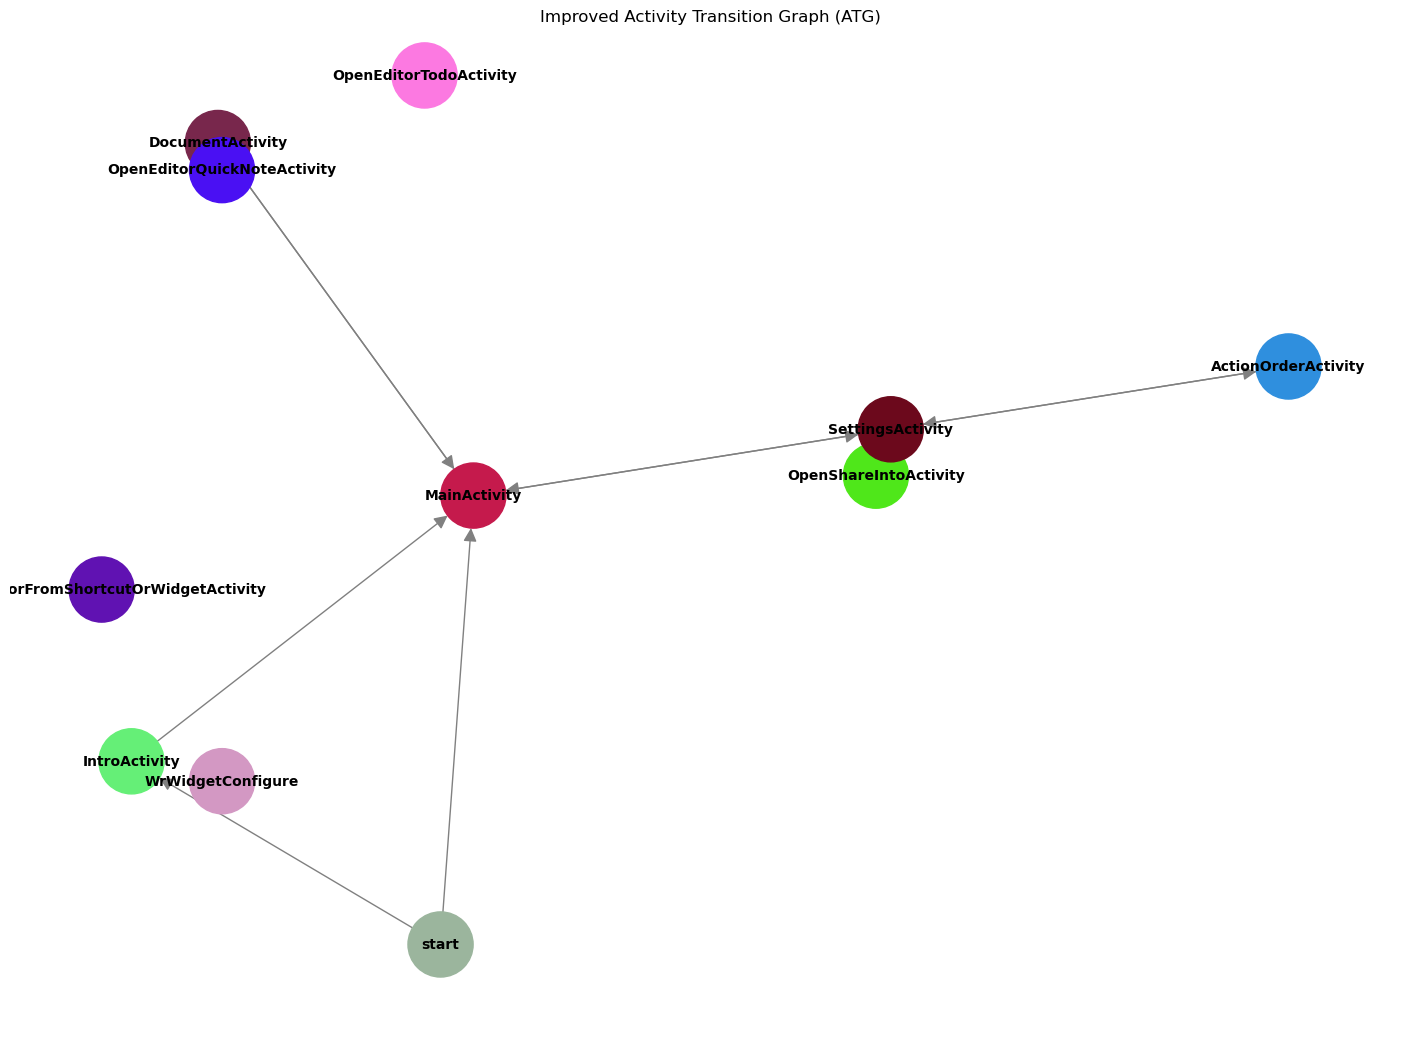

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# 定义节点和边
nodes = [
    'OpenShareIntoActivity',
    'ActionOrderActivity',
    'DocumentActivity',
    'OpenEditorTodoActivity',
    'OpenEditorQuickNoteActivity',
    'MainActivity',
    'OpenEditorFromShortcutOrWidgetActivity',
    'WrWidgetConfigure',
    'IntroActivity',
    'SettingsActivity'
]

edges = [
    'start -> MainActivity',
    'start -> IntroActivity',
    'IntroActivity -> MainActivity',
    'MainActivity -> DocumentActivity',
    'DocumentActivity -> MainActivity',
    'MainActivity -> SettingsActivity',
    'SettingsActivity -> MainActivity',
    'SettingsActivity -> ActionOrderActivity',
    'ActionOrderActivity -> SettingsActivity'
]

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(nodes + ['start'])  # 别忘了加 start

# 添加边
for edge in edges:
    src, dst = edge.split(' -> ')
    G.add_edge(src, dst)

# 使用 kamada_kawai_layout 改善节点分布
pos = nx.kamada_kawai_layout(G)

# 为每个节点分配不同的颜色
node_colors = {node: f"#{random.randint(0x100000, 0xFFFFFF):06x}" for node in G.nodes}

# 绘图
plt.figure(figsize=(14, 10))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2200,
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    arrowsize=20
)
plt.title("Improved Activity Transition Graph (ATG)")
plt.axis('off')
plt.tight_layout()
plt.show()
